<a href="https://colab.research.google.com/github/Mainabryan/sales-lead-conversion-prediction/blob/main/Lead_scoring(Machine_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the datset

In [ ]:
import pandas as pd
data = pd.read_csv('/content/lead_scoring_dataset_500.csv')

## Imprt the necessary libraries

In [5]:
# Data handling
import pandas as pd
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
 #Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#Clustering
from sklearn.cluster import KMeans
# Hyperparameter Tuning

## EDA(Exlatory data analysis)

In [7]:
data.head(20)

,lead_id,industry,budget,engagement_score,region,contact_count,converted,lead_source
0,L001,Tech,50000.0,0.80,North America,3,1,Web
1,L002,Finance,75000.0,0.60,Europe,2,0,Referral
2,L003,tech,NaN,0.90,Asia,4,1,Email
3,L004,Retail,20000.0,0.40,north america,1,0,Cold Call
4,L005,Health,100000.0,0.70,EUrope,5,1,Web
5,L006,TEch,30000.0,NaN,NorthAmerica,2,0,Referral
6,L007,Education,45000.0,0.50,Asia,3,0,Email
7,L008,Finanace,120000.0,0.90,Europe,4,1,Web
8,L009,Retail,25000.0,0.30,Asia,2,0,Cold Call
9,L010,Tech,80000.0,0.85,North America,3,1,Referral


In [8]:
data.tail()

,lead_id,industry,budget,engagement_score,region,contact_count,converted,lead_source
496,L496,Retail,60000.0,0.50,Asia,2,0,Email
497,L497,Finance,75000.0,0.90,Europe,1,1,Cold Call
498,L498,Tech,80000.0,0.85,NorthAmerica,3,1,Web
499,L499,Health,45000.0,0.60,asia,2,0,Referral
500,L500,Retail,30000.0,0.40,Europe,4,0,Email


In [11]:
data.columns

Index(['lead_id', 'industry', 'budget', 'engagement_score', 'region',
       'contact_count', 'converted', 'lead_source'],
      dtype='object')

In [12]:
data.describe(include='all')

,lead_id,industry,budget,engagement_score,region,contact_count,converted,lead_source
count,501,501,4.970000e+02,482.000000,501,501.000000,501.000000,501
unique,500,11,NaN,NaN,10,NaN,NaN,4
top,L001,Retail,NaN,NaN,Asia,NaN,NaN,Web
freq,2,94,NaN,NaN,116,NaN,NaN,127
mean,NaN,NaN,6.293763e+04,0.701971,NaN,2.522954,0.437126,NaN
std,NaN,NaN,9.903629e+04,0.161918,NaN,0.986900,0.496527,NaN
min,NaN,NaN,-5.000000e+03,0.300000,NaN,1.000000,0.000000,NaN
25%,NaN,NaN,4.000000e+04,0.600000,NaN,2.000000,0.000000,NaN
50%,NaN,NaN,5.500000e+04,0.700000,NaN,3.000000,0.000000,NaN
75%,NaN,NaN,7.500000e+04,0.850000,NaN,3.000000,1.000000,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lead_id           501 non-null    object 
 1   industry          501 non-null    object 
 2   budget            497 non-null    float64
 3   engagement_score  482 non-null    float64
 4   region            501 non-null    object 
 5   contact_count     501 non-null    int64  
 6   converted         501 non-null    int64  
 7   lead_source       501 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


To know the variables

In [14]:
data.value_counts()

,,,,,,,,count
lead_id,industry,budget,engagement_score,region,contact_count,converted,lead_source,
L001,Tech,50000.0,0.8,North America,3,1,Web,2
L344,Health,50000.0,0.6,europe,4,0,Email,1
L343,Finance,90000.0,0.9,Asia,2,1,Referral,1
L342,tech,70000.0,0.8,NorthAmerica,3,1,Web,1
L341,Retail,30000.0,0.4,Europe,1,0,Cold Call,1
...,...,...,...,...,...,...,...,...
L166,tech,60000.0,0.8,asia,2,1,Web,1
L165,Retail,35000.0,0.5,NorthAmerica,3,0,Cold Call,1
L164,Education,50000.0,0.7,Europe,4,0,Email,1


In [15]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:")
print(numeric_cols)


Numeric columns:
Index(['budget', 'engagement_score', 'contact_count', 'converted'], dtype='object')


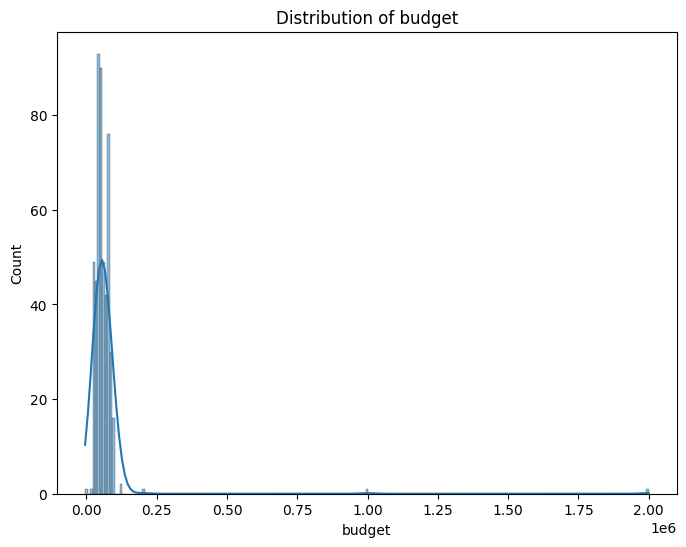

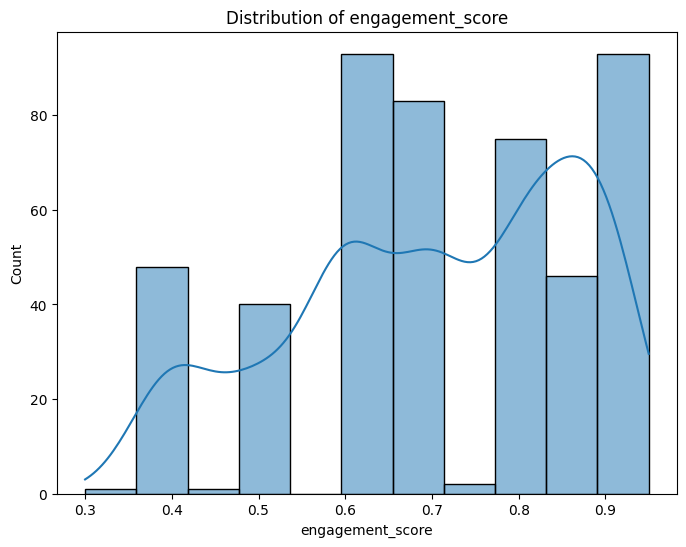

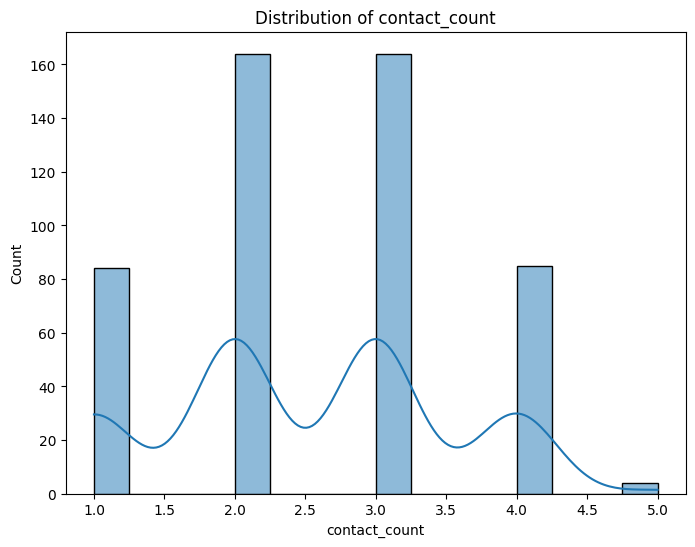

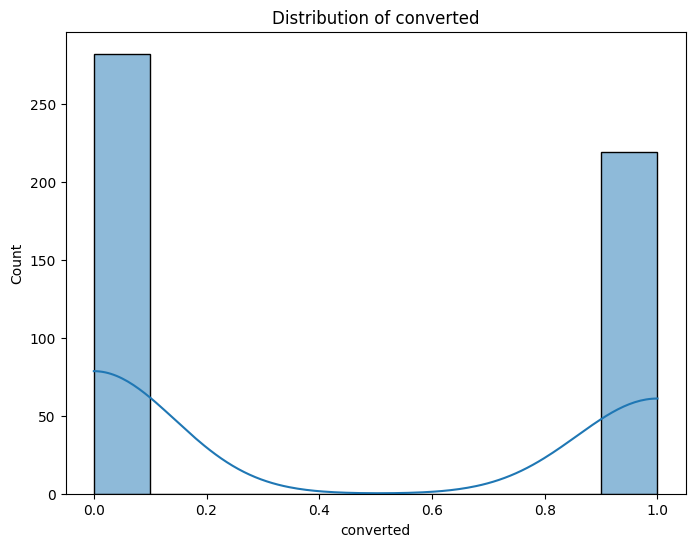

In [16]:
# Visualize the numeric
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()